In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Dense, LeakyReLU

In [4]:
dataset = np.load("dataset_8_01.npy")
short_dataset = np.load("short_dataset_8_01.npy")
combined_dataset = np.concatenate((dataset, short_dataset), axis=0)
print("Combined dataset shape:", combined_dataset.shape)

Combined dataset shape: (199780, 2, 128)


In [5]:
input_shape = (128,)
epochs = 100
batch_size = 1000

In [6]:
inputs = np.array(combined_dataset[:, 0])
outputs = np.array(combined_dataset[:, 1])

In [7]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.15, random_state=73)

In [8]:
inputs_train, inputs_val, outputs_train, outputs_val = train_test_split(inputs_train, outputs_train, test_size=0.1, random_state=73)

In [9]:
inputs_train = np.array(inputs_train)
outputs_train = np.array(outputs_train)
inputs_test = np.array(inputs_test)
outputs_test = np.array(outputs_test)
inputs_val = np.array(inputs_val)
outputs_val = np.array(outputs_val)

In [10]:
print(len(inputs_train))
print(len(inputs_test))
print(len(inputs_val))

152831
29967
16982


In [11]:
print(inputs_train[0])

[-0.82598887 -0.93942603 -0.94448998 -0.91705198 -0.8969339  -0.94256391
 -0.91702164 -0.69336565 -0.93533726 -0.8944864  -0.93078444 -0.96565758
 -0.91134191 -0.98747428 -0.95894074 -0.77594786 -0.93276164 -0.97480335
 -0.95106501 -0.90907206 -0.91858446 -0.9346192  -0.93825566 -0.92367781
 -0.86677554 -0.92928692 -0.96217082 -0.92136341 -0.91310185 -0.8037469
 -0.90611545 -0.90837794 -0.94359606 -0.94370285 -0.92364745 -0.84679408
 -0.94290474 -0.99770813 -0.7983572  -0.91057089 -0.91888823 -0.96923143
 -0.96323181 -0.99116437 -0.91971945 -0.91744649 -0.93489467 -0.98121624
 -0.77127094 -0.91739369 -0.94612634 -0.92139394 -0.97076403 -0.96184236
 -0.86517116 -0.91993101 -0.81880909 -0.90293416 -0.8824458  -0.95338406
 -0.87545975 -0.93666739 -0.99578085 -0.92282905  0.56368643  0.3427517
  0.32854022  0.39876768  0.44216466  0.33402586  0.39883745  0.72058592
  0.35375729  0.44709517  0.36556849  0.25981807  0.41165025  0.15778007
  0.28360651  0.63079704  0.36049371  0.22306595  0.3

In [12]:
def autoencoder_dense_1(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    # Encoder
    model.add(Dense(64, activation='relu'))
    # Decoder
    model.add(Dense(128, activation='linear'))
    return model

def autoencoder_dense_2(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    # Encoder
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    # Decoder
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='linear'))
    return model

def autoencoder_dense_3(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    # Encoder
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    # Decoder
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='linear'))
    return model

In [13]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [14]:
dense_1 = autoencoder_dense_1(input_shape)
dense_1.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

In [15]:
history_d1 = dense_1.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False,
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0149 - loss: 0.2687 - val_accuracy: 0.0314 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0345 - loss: 0.0425 - val_accuracy: 0.0439 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0460 - loss: 0.0324 - val_accuracy: 0.0552 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0571 - loss: 0.0270 - val_accuracy: 0.0678 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0690 - loss: 0.0237 - val_accuracy: 0.0780 - val_loss: 0.0220 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0798 - loss: 0.0215 - val_accuracy: 0.0883 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0897 - loss: 0

Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1956 - loss: 0.0089 - val_accuracy: 0.1948 - val_loss: 0.0089 - learning_rate: 1.9531e-06
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1956 - loss: 0.0089 - val_accuracy: 0.1949 - val_loss: 0.0089 - learning_rate: 1.9531e-06
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1956 - loss: 0.0089 - val_accuracy: 0.1949 - val_loss: 0.0089 - learning_rate: 1.9531e-06
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1955 - loss: 0.0089 - val_accuracy: 0.1951 - val_loss: 0.0089 - learning_rate: 1.0000e-06
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1954 - loss: 0.0089 - val_accuracy: 0.1951 - val_loss: 0.0089 - learning_rate: 1.0000e-06
Epoch 92/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1954 - loss: 0.0089 - val_accuracy: 0.1951 - val_loss: 0.0089 - learning_rate: 1.0000e-06
Epoch 93/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/st

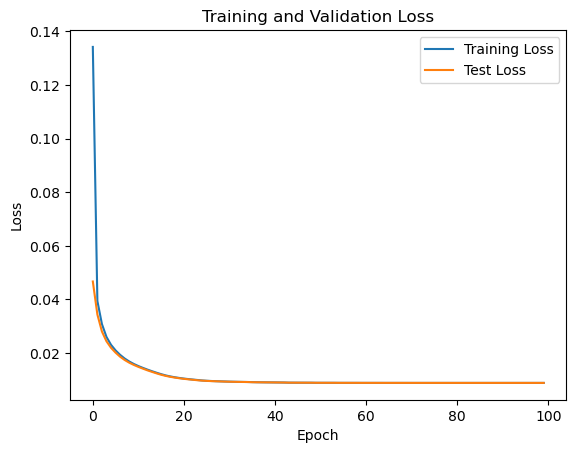

In [16]:
plt.plot(history_d1.history['loss'], label='Training Loss')
plt.plot(history_d1.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

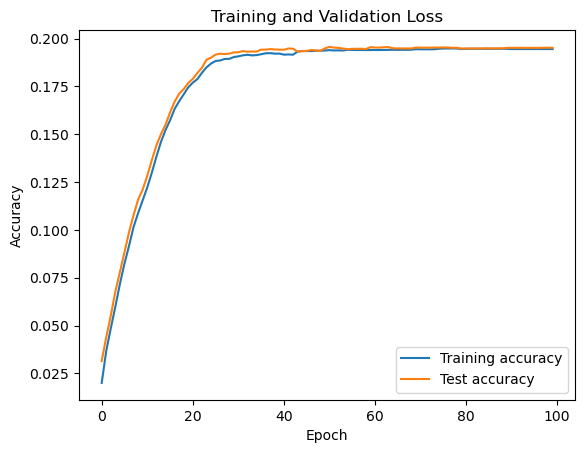

In [17]:
plt.plot(history_d1.history['accuracy'], label='Training accuracy')
plt.plot(history_d1.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [18]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [19]:
dense_2 = autoencoder_dense_2(input_shape)
dense_2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

In [20]:
history_d2 = dense_2.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False, 
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.0135 - loss: 0.2607 - val_accuracy: 0.0281 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0311 - loss: 0.0379 - val_accuracy: 0.0425 - val_loss: 0.0318 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0470 - loss: 0.0297 - val_accuracy: 0.0585 - val_loss: 0.0254 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0595 - loss: 0.0244 - val_accuracy: 0.0638 - val_loss: 0.0227 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0653 - loss: 0.0222 - val_accuracy: 0.0682 - val_loss: 0.0213 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0693 - loss: 0.0210 - val_accuracy: 0.0744 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0739 - 

Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1282 - loss: 0.0126 - val_accuracy: 0.1334 - val_loss: 0.0127 - learning_rate: 1.5625e-05
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1282 - loss: 0.0126 - val_accuracy: 0.1335 - val_loss: 0.0127 - learning_rate: 1.5625e-05
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1281 - loss: 0.0126 - val_accuracy: 0.1334 - val_loss: 0.0127 - learning_rate: 1.5625e-05
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1283 - loss: 0.0126 - val_accuracy: 0.1341 - val_loss: 0.0127 - learning_rate: 7.8125e-06
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1281 - loss: 0.0126 - val_accuracy: 0.1340 - val_loss: 0.0127 - learning_rate: 7.8125e-06
Epoch 92/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1282 - loss: 0.0126 - val_accuracy: 0.1338 - val_loss: 0.0127 - learning_rate: 7.8125e-06
Epoch 93/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 1

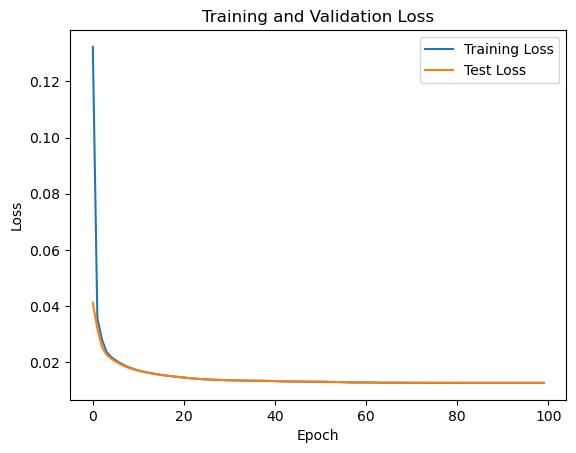

In [21]:
plt.plot(history_d2.history['loss'], label='Training Loss')
plt.plot(history_d2.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

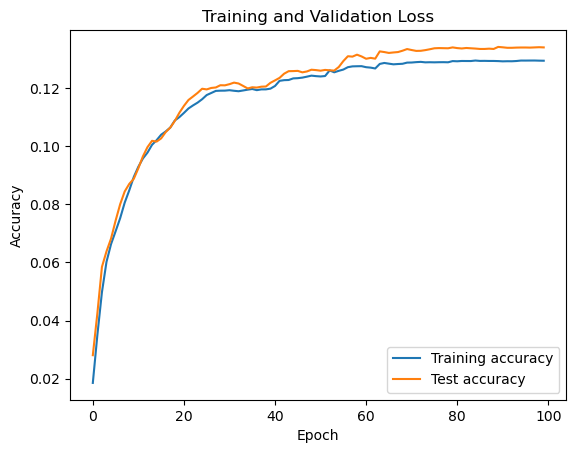

In [22]:
plt.plot(history_d2.history['accuracy'], label='Training accuracy')
plt.plot(history_d2.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [23]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [24]:
dense_3 = autoencoder_dense_3(input_shape)
dense_3.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

In [25]:
history_d3 = dense_3.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False, 
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.0147 - loss: 0.2747 - val_accuracy: 0.0208 - val_loss: 0.0437 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0243 - loss: 0.0416 - val_accuracy: 0.0331 - val_loss: 0.0380 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0347 - loss: 0.0364 - val_accuracy: 0.0414 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0409 - loss: 0.0316 - val_accuracy: 0.0428 - val_loss: 0.0287 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0470 - loss: 0.0278 - val_accuracy: 0.0511 - val_loss: 0.0250 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0545 - loss: 0.0242 - val_accuracy: 0.0587 - val_loss: 0.0230 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0579 - 

153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0729 - loss: 0.0191 - val_accuracy: 0.0727 - val_loss: 0.0192 - learning_rate: 1.0000e-06
Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0729 - loss: 0.0191 - val_accuracy: 0.0727 - val_loss: 0.0192 - learning_rate: 1.0000e-06
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0729 - loss: 0.0191 - val_accuracy: 0.0727 - val_loss: 0.0192 - learning_rate: 1.0000e-06
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0729 - loss: 0.0191 - val_accuracy: 0.0727 - val_loss: 0.0192 - learning_rate: 1.0000e-06
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0729 - loss: 0.0191 - val_accuracy: 0.0727 - val_loss: 0.0192 - learning_rate: 1.0000e-06
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0729 - loss: 0.0191 - val_accuracy: 0.0727 - val_loss: 0.0192 - learning_rate: 1.0000e-06
Epoch 92/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accu

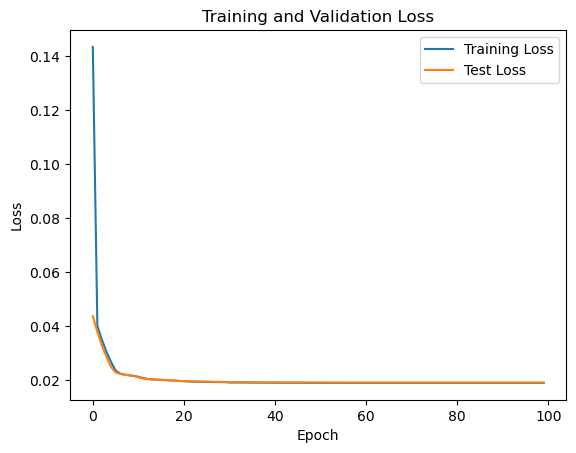

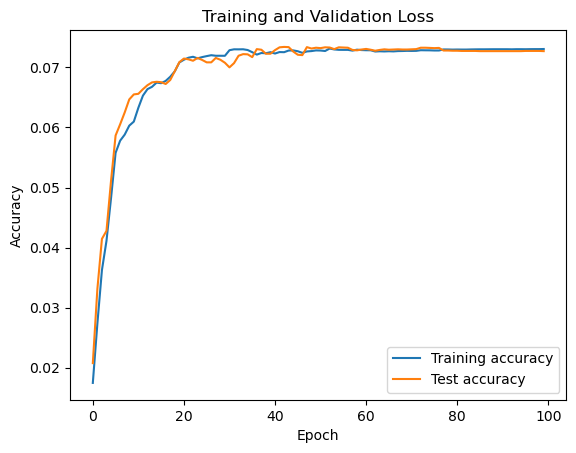

In [26]:
plt.plot(history_d3.history['loss'], label='Training Loss')
plt.plot(history_d3.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history_d3.history['accuracy'], label='Training accuracy')
plt.plot(history_d3.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [27]:
def calculate_angles(sin_cos_conf, L):
    angles_conf = tf.atan2(sin_cos_conf[:, :L*L], sin_cos_conf[:, L*L:], )
    return angles_conf

def periodic_index(value, max_value):
    return tf.math.mod(value, max_value)


def periodic_diff(angle1, angle2):
    diff = angle1 - angle2
    diff = tf.where(diff > np.pi, diff - 2 * np.pi, diff)
    diff = tf.where(diff < -np.pi, diff + 2 * np.pi, diff)
    return diff

@tf.function
def calculate_single_lattice_energy(angles, L, J):
    # shape of the input data: number of elements in the batch, L, L
    angles = tf.reshape(angles, (L, L))

    indices = tf.range(L)
    grid_x, grid_y = tf.meshgrid(indices, indices)
    
    cell_indices = tf.stack([grid_x, grid_y], axis=-1)
    cell_indices = tf.reshape(cell_indices, (-1, 2))


    def energy_per_cell(index):
        # indices in this iteration
        i = index[0]
        j = index[1]

        neighbors = [
            angles[periodic_index(i + 1, L), j], # down
            angles[periodic_index(i - 1, L), j], # up
            angles[i, periodic_index(j + 1, L)], # right
            angles[i, periodic_index(j - 1, L)]  # left
        ]

        local_energy = tf.reduce_sum(-J * tf.math.cos(periodic_diff(angles[i, j], neighbors)))
        return local_energy


    energy_contributions = tf.vectorized_map(
            energy_per_cell,
            cell_indices
    )
    total_energy = tf.reduce_sum(energy_contributions) 

    return total_energy / 2

@tf.function
def calculate_energy(angles_batch, L, J):
    energies = tf.vectorized_map(
        lambda angles: calculate_single_lattice_energy(angles, L, J),
        angles_batch
    )
    return energies

In [28]:
@tf.function
def energy_difference(y_true, y_pred):
#     tf.config.run_functions_eagerly(False)
    L = 8
    J = 1
 
    y_true_angles = calculate_angles(y_true, L)
    y_pred_angles = calculate_angles(y_pred, L)
    
    true_energies = calculate_energy(y_true_angles, L, J)
    pred_energies = calculate_energy(y_pred_angles, L, J)
    
    energy_diff = tf.abs(true_energies - pred_energies)
    mean_energy_diff = tf.reduce_mean(energy_diff)
    
    return mean_energy_diff

In [29]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [30]:
dense_1_ed = autoencoder_dense_1(input_shape)
dense_1_ed.compile(optimizer=optimizer, loss=energy_difference, metrics=['accuracy'])

In [31]:
history_d1_ed = dense_1_ed.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False,
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 70s 208ms/step - accuracy: 0.0086 - loss: 51.1420 - val_accuracy: 0.0150 - val_loss: 1.8358 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.0136 - loss: 1.3144 - val_accuracy: 0.0125 - val_loss: 0.9064 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.0123 - loss: 0.8472 - val_accuracy: 0.0122 - val_loss: 0.7894 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 24s 156ms/step - accuracy: 0.0119 - loss: 0.7516 - val_accuracy: 0.0124 - val_loss: 0.7333 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 168ms/step - accuracy: 0.0121 - loss: 0.6950 - val_accuracy: 0.0128 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - accuracy: 0.0122 - loss: 0.6535 - val_accuracy: 0.0127 - val_loss: 0.6595 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accur

Epoch 44/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 25s 163ms/step - accuracy: 0.0138 - loss: 0.3977 - val_accuracy: 0.0142 - val_loss: 0.4587 - learning_rate: 0.0010
Epoch 45/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/step - accuracy: 0.0139 - loss: 0.3964 - val_accuracy: 0.0143 - val_loss: 0.4576 - learning_rate: 0.0010
Epoch 46/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.0139 - loss: 0.3929 - val_accuracy: 0.0145 - val_loss: 0.4546 - learning_rate: 0.0010
Epoch 47/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.0140 - loss: 0.3910 - val_accuracy: 0.0146 - val_loss: 0.4545 - learning_rate: 0.0010
Epoch 48/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.0138 - loss: 0.3904 - val_accuracy: 0.0145 - val_loss: 0.4517 - learning_rate: 0.0010
Epoch 49/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 168ms/step - accuracy: 0.0140 - loss: 0.3883 - val_accuracy: 0.0144 - val_loss: 0.4494 - learning_rate: 0.0010
Epoch 50/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 170ms/step -

Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 28s 180ms/step - accuracy: 0.0136 - loss: 0.3387 - val_accuracy: 0.0135 - val_loss: 0.4250 - learning_rate: 5.0000e-04
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 176ms/step - accuracy: 0.0136 - loss: 0.3377 - val_accuracy: 0.0134 - val_loss: 0.4234 - learning_rate: 5.0000e-04
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.0136 - loss: 0.3373 - val_accuracy: 0.0136 - val_loss: 0.4239 - learning_rate: 5.0000e-04
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.0137 - loss: 0.3374 - val_accuracy: 0.0133 - val_loss: 0.4223 - learning_rate: 5.0000e-04
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - accuracy: 0.0138 - loss: 0.3358 - val_accuracy: 0.0135 - val_loss: 0.4225 - learning_rate: 5.0000e-04
Epoch 92/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.0136 - loss: 0.3354 - val_accuracy: 0.0136 - val_loss: 0.4198 - learning_rate: 5.0000e-04
Epoch 93/100
153/153 ━━━━━━━━━━━━━

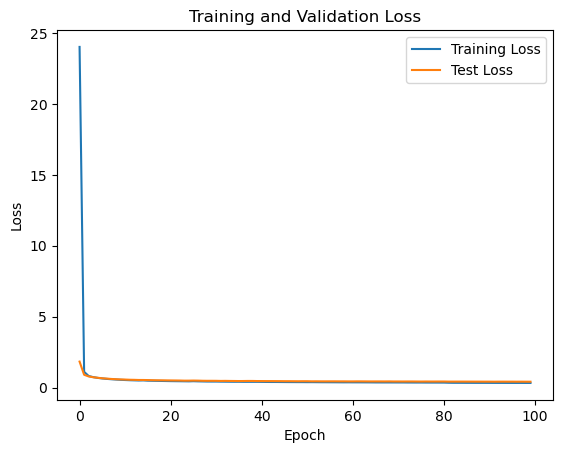

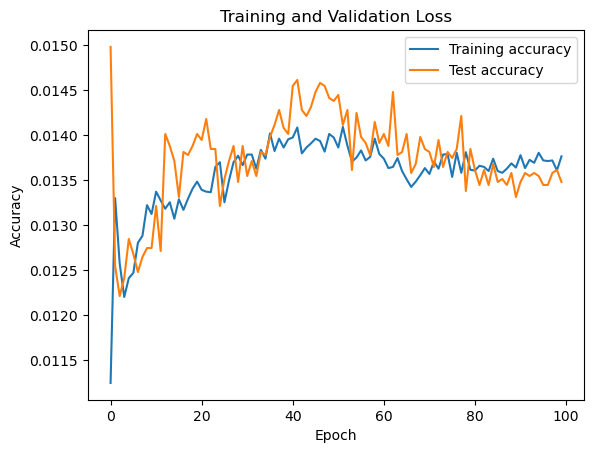

In [32]:
plt.plot(history_d1_ed.history['loss'], label='Training Loss')
plt.plot(history_d1_ed.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history_d1_ed.history['accuracy'], label='Training accuracy')
plt.plot(history_d1_ed.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [33]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [34]:
dense_2_ed = autoencoder_dense_2(input_shape)
dense_2_ed.compile(optimizer=optimizer, loss=energy_difference, metrics=['accuracy'])

In [35]:
history_d2_ed = dense_2_ed.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False,
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 57s 229ms/step - accuracy: 0.0070 - loss: 41.9758 - val_accuracy: 0.0073 - val_loss: 1.1484 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.0065 - loss: 1.0155 - val_accuracy: 0.0072 - val_loss: 0.8735 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.0063 - loss: 0.8292 - val_accuracy: 0.0074 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 25s 166ms/step - accuracy: 0.0066 - loss: 0.7438 - val_accuracy: 0.0076 - val_loss: 0.7112 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 178ms/step - accuracy: 0.0066 - loss: 0.6826 - val_accuracy: 0.0075 - val_loss: 0.6628 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.0066 - loss: 0.6373 - val_accuracy: 0.0070 - val_loss: 0.6454 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - accur

Epoch 44/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - accuracy: 0.0061 - loss: 0.4108 - val_accuracy: 0.0064 - val_loss: 0.4686 - learning_rate: 5.0000e-04
Epoch 45/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.0061 - loss: 0.4070 - val_accuracy: 0.0066 - val_loss: 0.4716 - learning_rate: 5.0000e-04
Epoch 46/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.0062 - loss: 0.4046 - val_accuracy: 0.0066 - val_loss: 0.4694 - learning_rate: 5.0000e-04
Epoch 47/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 168ms/step - accuracy: 0.0061 - loss: 0.4043 - val_accuracy: 0.0066 - val_loss: 0.4682 - learning_rate: 5.0000e-04
Epoch 48/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.0060 - loss: 0.4009 - val_accuracy: 0.0066 - val_loss: 0.4676 - learning_rate: 5.0000e-04
Epoch 49/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 169ms/step - accuracy: 0.0060 - loss: 0.3981 - val_accuracy: 0.0067 - val_loss: 0.4695 - learning_rate: 5.0000e-04
Epoch 50/100
153/153 ━━━━━━━━━━━━━

153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - accuracy: 0.0057 - loss: 0.3610 - val_accuracy: 0.0059 - val_loss: 0.4424 - learning_rate: 1.2500e-04
Epoch 87/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - accuracy: 0.0057 - loss: 0.3610 - val_accuracy: 0.0059 - val_loss: 0.4423 - learning_rate: 1.2500e-04
Epoch 88/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.0058 - loss: 0.3615 - val_accuracy: 0.0060 - val_loss: 0.4423 - learning_rate: 1.2500e-04
Epoch 89/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.0058 - loss: 0.3606 - val_accuracy: 0.0059 - val_loss: 0.4382 - learning_rate: 6.2500e-05
Epoch 90/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.0058 - loss: 0.3587 - val_accuracy: 0.0058 - val_loss: 0.4390 - learning_rate: 6.2500e-05
Epoch 91/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.0057 - loss: 0.3582 - val_accuracy: 0.0058 - val_loss: 0.4385 - learning_rate: 6.2500e-05
Epoch 92/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 41s 1

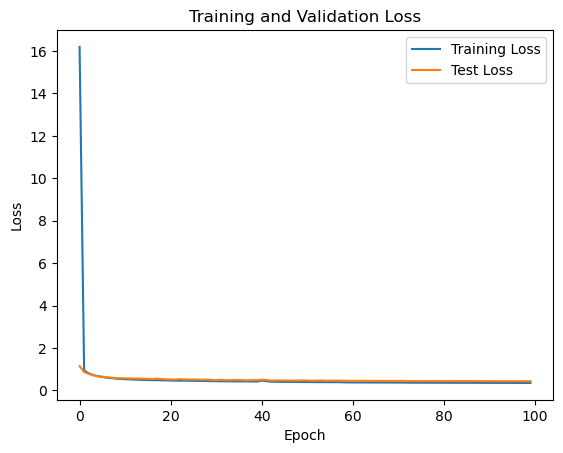

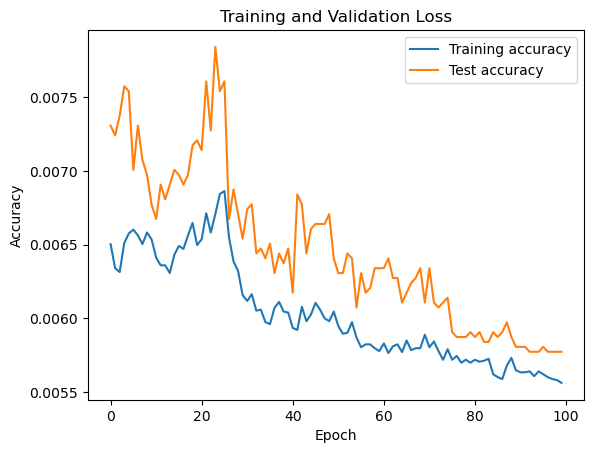

In [36]:
plt.plot(history_d2_ed.history['loss'], label='Training Loss')
plt.plot(history_d2_ed.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history_d2_ed.history['accuracy'], label='Training accuracy')
plt.plot(history_d2_ed.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [37]:
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [38]:
dense_3_ed = autoencoder_dense_3(input_shape)
dense_3_ed.compile(optimizer=optimizer, loss=energy_difference, metrics=['accuracy'])

In [39]:
history_d3_ed = dense_3_ed.fit(
                inputs_train, 
                outputs_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                shuffle=False,
                callbacks=[lr_scheduler],
                validation_data=(inputs_test, outputs_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 45s 169ms/step - accuracy: 0.0084 - loss: 45.0586 - val_accuracy: 0.0089 - val_loss: 12.5308 - learning_rate: 0.0010
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.0090 - loss: 7.8749 - val_accuracy: 0.0094 - val_loss: 0.8727 - learning_rate: 0.0010
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.0092 - loss: 0.8297 - val_accuracy: 0.0095 - val_loss: 0.7381 - learning_rate: 0.0010
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.0093 - loss: 0.7193 - val_accuracy: 0.0096 - val_loss: 0.6853 - learning_rate: 0.0010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - accuracy: 0.0094 - loss: 0.6565 - val_accuracy: 0.0095 - val_loss: 0.6606 - learning_rate: 0.0010
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.0093 - loss: 0.6234 - val_accuracy: 0.0097 - val_loss: 0.6184 - learning_rate: 0.0010
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accu

Epoch 44/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.0092 - loss: 0.4165 - val_accuracy: 0.0092 - val_loss: 0.4678 - learning_rate: 0.0010
Epoch 45/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.0092 - loss: 0.4123 - val_accuracy: 0.0092 - val_loss: 0.4668 - learning_rate: 0.0010
Epoch 46/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.0091 - loss: 0.4107 - val_accuracy: 0.0092 - val_loss: 0.4612 - learning_rate: 0.0010
Epoch 47/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.0091 - loss: 0.4113 - val_accuracy: 0.0092 - val_loss: 0.4748 - learning_rate: 0.0010
Epoch 48/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.0091 - loss: 0.4093 - val_accuracy: 0.0092 - val_loss: 0.4908 - learning_rate: 0.0010
Epoch 49/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.0091 - loss: 0.4144 - val_accuracy: 0.0091 - val_loss: 0.4676 - learning_rate: 0.0010
Epoch 50/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step -

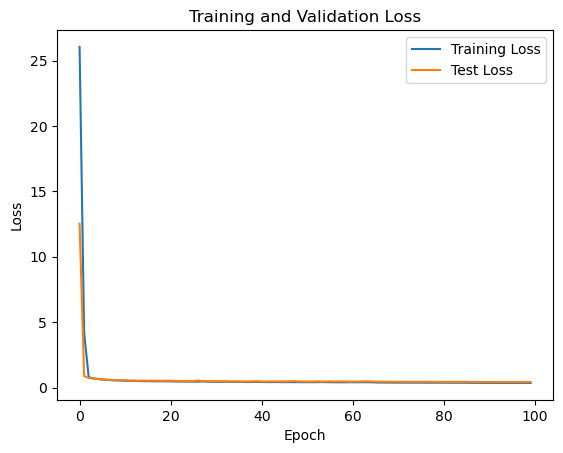

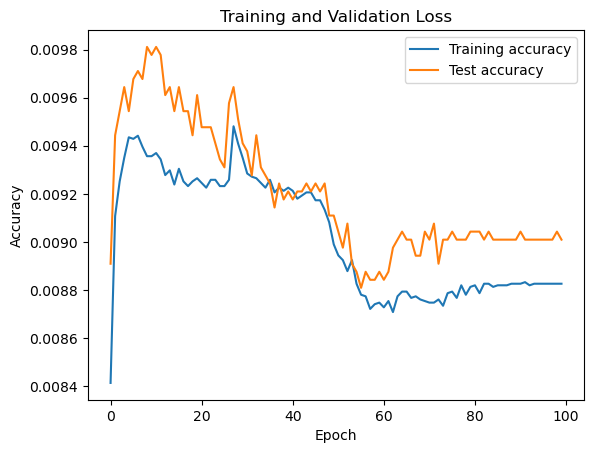

In [40]:
plt.plot(history_d3_ed.history['loss'], label='Training Loss')
plt.plot(history_d3_ed.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history_d3_ed.history['accuracy'], label='Training accuracy')
plt.plot(history_d3_ed.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [41]:
histories = [history_d1, history_d2, history_d3]
histories_ed = [history_d1_ed, history_d2_ed, history_d3_ed]
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "lime", "cyan"]
names = ["dense_1", "dense_2", "dense_3", "dense_1_custom_loss", "dense_2_custom_loss", "dense_3_custom_loss"]

In [42]:
import matplotlib.pyplot as plt

def plot_training_histories(histories, colors, names, skip=0):
    """Plots training and validation loss curves for multiple models.

    Args:
        histories (list): List of Keras History objects.
        colors (list): List of colors for each model's line.
        names (list): List of names for each model.
    """

    plt.figure(figsize=(12, 4))

    for history, color, name in zip(histories, colors, names):
        # Extract training and validation loss from history
        train_loss = history.history['loss'][skip:]
        val_loss = history.history['val_loss'][skip:]
        epochs = range(1, len(train_loss) + 1)

        # Plot training loss (solid line)
        plt.plot(epochs, train_loss, color=color, label=f'{name} (train)', linestyle='-')

        # Plot validation loss (dashed line)
        plt.plot(epochs, val_loss, color=color, label=f'{name} (val)', linestyle='--')

    # Add labels, title, and legend
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()


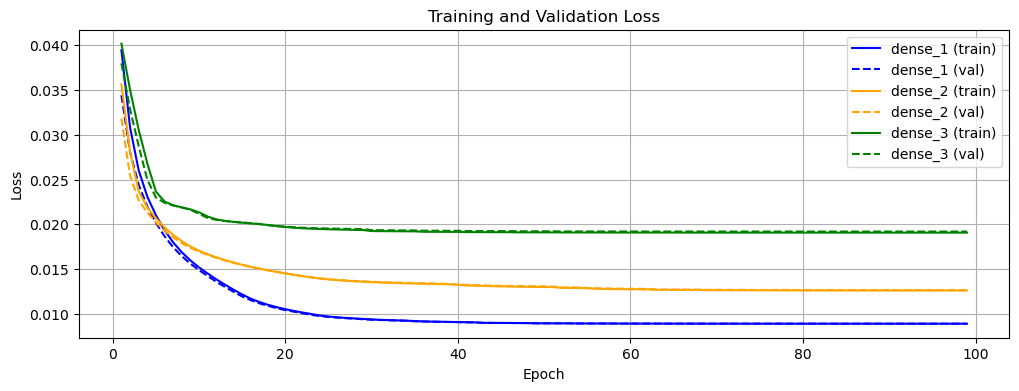

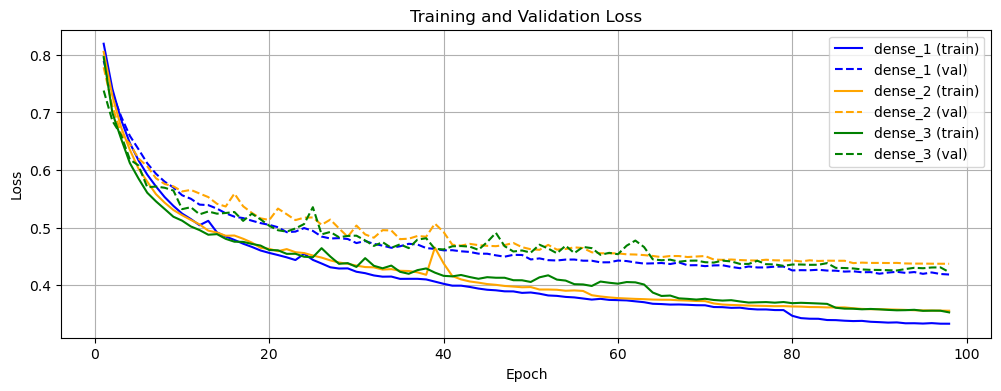

In [43]:
# ... (Your code to train multiple models, storing histories in the 'histories' list)
plot_training_histories(histories, colors, names, skip=1)
plot_training_histories(histories_ed, colors, names, skip=2)


In [44]:
models = [dense_1, dense_2, dense_3, dense_1_ed, dense_2_ed, dense_3_ed]
model_histories = [history_d1, history_d2, history_d3, history_d1_ed, history_d2_ed, history_d3_ed]
names_models = ["dense_1_8_01_relu_linear", "dense_2_8_01_relu_linear", "dense_3_8_01_relu_linear", "dense_1_custom_loss_8_01_relu_linear", "dense_2_custom_loss_8_01_relu_linear", "dense_3_custom_loss_8_01_relu_linear"]

In [45]:
import pickle

for i, model in enumerate(models):
    model.save(f"C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/RL_bonus/{names_models[i]}.h5")
    model.save(f"C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/RL_bonus/{names_models[i]}.keras")

    
    with open(f"C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/RL_bonus/{names_models[i]}.pkl", "wb") as pickle_file:
        pickle.dump(model_histories[i].history, pickle_file)
    # Save the entire model to a HDF5 file
#     autoencoder_energy_2.save('C:/Users/hmpor/Jupyter Notebooks/Thesis/trained_models/autoencoder_multiple_simulations_model.h5')
#     autoencoder_energy_2.save('C:/Users/hmpor/Jupyter Notebooks/Thesis/trained_models/autoencoder_multiple_simulations_model.keras')


In [16]:
names_models = ["dense_1_8_01_relu_linear", "dense_2_8_01_relu_linear", "dense_3_8_01_relu_linear", "dense_1_custom_loss_8_01_relu_linear", "dense_2_custom_loss_8_01_relu_linear", "dense_3_custom_loss_8_01_relu_linear"]

In [17]:
import pickle

# names_models = ["dense_1_8_01_leakyrelu_tanh", "dense_2_8_01_leakyrelu_tanh", "dense_3_8_01_leakyrelu_tanh", "dense_1_custom_loss_8_01_leakyrelu_tanh", "dense_2_custom_loss_8_01_leakyrelu_tanh", "dense_3_custom_loss_8_01_leakyrelu_tanh"]

histories = []

for i, _ in enumerate(names_models):    
    with open(f"C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/RL_bonus/{names_models[i]}.pkl", 'rb') as pickle_file:
        history = pickle.load(pickle_file)
    
    histories.append(history)


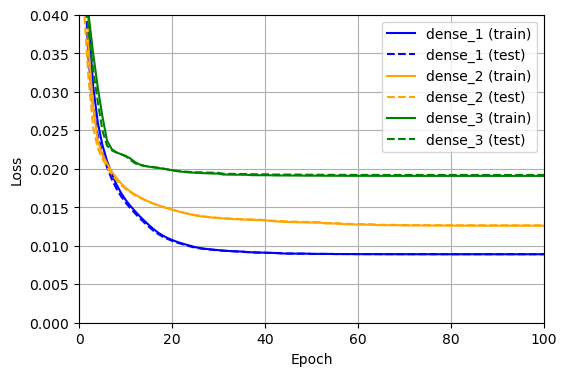

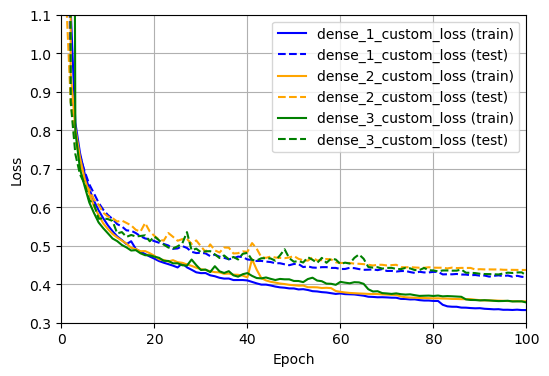

531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[0.008663391828214597, 0.01225902746383003, 0.018487034870623514, 2.5822183151798908, 2.1224860597586317, 1.9229653574579904]
[<tf.Tensor: shape=(), dtype=float64, numpy=2.253188418901074>, <tf.Tensor: shape=(), dtype=float64, numpy=2.8440250313585396>, <tf.Tensor: shape=(), dtype=float64, numpy=3.383985293920841>, <tf.Tensor: shape=(), dtype=float64, numpy=0.4071030396760185>, <tf.Tensor: shape=(), dtype=float64, numpy=0.42704639877163814>, <tf.Tensor: shape=(), dtype=float64, numpy=0.40672496426198157>]


In [20]:
names = ["dense_1", "dense_2", "dense_3", "dense_1_custom_loss", "dense_2_custom_loss", "dense_3_custom_loss"]
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "lime", "cyan"]

import matplotlib.pyplot as plt

def plot_training_histories(histories, colors, names, ylim, skip=0, title="plot.png"):
    """Plots training and validation loss curves for multiple models.

    Args:
        histories (list): List of Keras History objects.
        colors (list): List of colors for each model's line.
        names (list): List of names for each model.
    """

    plt.figure(figsize=(6, 4))

    for history, color, name in zip(histories, colors, names):
        # Extract training and validation loss from history
        train_loss = history['loss'][skip:]
        val_loss = history['val_loss'][skip:]
        epochs = range(1, len(train_loss) + 1)

        # Plot training loss (solid line)
        plt.plot(epochs, train_loss, color=color, label=f'{name} (train)', linestyle='-')

        # Plot validation loss (dashed line)
        plt.plot(epochs, val_loss, color=color, label=f'{name} (test)', linestyle='--')

    # Add labels, title, and legend
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xlim(0, 100)
    if ylim != (0, 0):
        plt.ylim(ylim)
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.savefig(title, bbox_inches='tight')
    plt.show()

plot_training_histories(histories[:3], colors, names[:3], (0.0, 0.04), skip=0, title="mse_RL.png")
plot_training_histories(histories[3:], colors, names[3:], (0.3, 1.1), skip=0, title="ED_RL.png")

from tensorflow.keras.models import load_model

models = []
# names_models = ["dense_1_8_01_leakyrelu_tanh", "dense_2_8_01_leakyrelu_tanh", "dense_3_8_01_leakyrelu_tanh", "dense_1_custom_loss_8_01_leakyrelu_tanh", "dense_2_custom_loss_8_01_leakyrelu_tanh", "dense_3_custom_loss_8_01_leakyrelu_tanh"]
base_path = "C:/Users/hmpor/Jupyter Notebooks/Thesis/Model training/Models/RL_bonus/"
paths = []

for model_name in names_models:
    model_path = base_path + model_name + ".h5"  # Load the .h5 format
    paths.append(model_path)
    
def calculate_angles(sin_cos_conf, L):
    angles_conf = tf.atan2(sin_cos_conf[:, :L*L], sin_cos_conf[:, L*L:], )
    return angles_conf

def periodic_index(value, max_value):
    return tf.math.mod(value, max_value)


def periodic_diff(angle1, angle2):
    diff = angle1 - angle2
    diff = tf.where(diff > np.pi, diff - 2 * np.pi, diff)
    diff = tf.where(diff < -np.pi, diff + 2 * np.pi, diff)
    return diff

@tf.function
def calculate_single_lattice_energy(angles, L, J):
    # shape of the input data: number of elements in the batch, L, L
    angles = tf.reshape(angles, (L, L))

    indices = tf.range(L)
    grid_x, grid_y = tf.meshgrid(indices, indices)
    
    cell_indices = tf.stack([grid_x, grid_y], axis=-1)
    cell_indices = tf.reshape(cell_indices, (-1, 2))


    def energy_per_cell(index):
        # indices in this iteration
        i = index[0]
        j = index[1]

        neighbors = [
            angles[periodic_index(i + 1, L), j], # down
            angles[periodic_index(i - 1, L), j], # up
            angles[i, periodic_index(j + 1, L)], # right
            angles[i, periodic_index(j - 1, L)]  # left
        ]

        local_energy = tf.reduce_sum(-J * tf.math.cos(periodic_diff(angles[i, j], neighbors)))
        return local_energy


    energy_contributions = tf.vectorized_map(
            energy_per_cell,
            cell_indices
    )
    total_energy = tf.reduce_sum(energy_contributions) 

    return total_energy / 2

@tf.function
def calculate_energy(angles_batch, L, J):
    energies = tf.vectorized_map(
        lambda angles: calculate_single_lattice_energy(angles, L, J),
        angles_batch
    )
    return energies

@tf.function
def energy_difference(y_true, y_pred):
#     tf.config.run_functions_eagerly(False)
    L = 8
    J = 1
 
    y_true_angles = calculate_angles(y_true, L)
    y_pred_angles = calculate_angles(y_pred, L)
    
    true_energies = calculate_energy(y_true_angles, L, J)
    pred_energies = calculate_energy(y_pred_angles, L, J)
    
    true_energies = tf.cast(true_energies, tf.float64)
    pred_energies = tf.cast(pred_energies, tf.float64)
    
    energy_diff = tf.abs(true_energies - pred_energies)
    mean_energy_diff = tf.reduce_mean(energy_diff)
    
    return mean_energy_diff

dense_1 = autoencoder_dense_1(input_shape)
dense_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
dense_1.load_weights(paths[0])

dense_2 = autoencoder_dense_2(input_shape)
dense_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
dense_2.load_weights(paths[1])

dense_3 = autoencoder_dense_3(input_shape)
dense_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
dense_3.load_weights(paths[2])

dense_1_ed = autoencoder_dense_1(input_shape)
dense_1_ed.compile(optimizer='adam', loss=energy_difference, metrics=['accuracy'])
dense_1_ed.load_weights(paths[3])

dense_2_ed = autoencoder_dense_2(input_shape)
dense_2_ed.compile(optimizer='adam', loss=energy_difference, metrics=['accuracy'])
dense_2_ed.load_weights(paths[4])

dense_3_ed = autoencoder_dense_3(input_shape)
dense_3_ed.compile(optimizer='adam', loss=energy_difference, metrics=['accuracy'])
dense_3_ed.load_weights(paths[5])    


from sklearn.metrics import mean_squared_error

models = [dense_1, dense_2, dense_3, dense_1_ed, dense_2_ed, dense_3_ed]
score_mse = []
score_ed = []

for i, model in enumerate(models):
    predictions = model.predict(inputs_val)
    
    outputs_val_casted = tf.cast(outputs_val, tf.float64)
    predictions_casted = tf.cast(predictions, tf.float64)
    
    mse_value = mean_squared_error(outputs_val, predictions)
    ed_value = energy_difference(outputs_val, predictions)
    
    score_mse.append(mse_value)
    score_ed.append(ed_value)
   
print(score_mse)
print(score_ed)